In [135]:
# !pip install vtreat


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from pyearth import Earth

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [3]:
df.describe()

NameError: name 'df' is not defined

In [36]:
df = pd.read_csv('Zillow_KC_listings.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
Unnamed: 0     5 non-null int64
bedrooms       5 non-null float64
bathrooms      5 non-null float64
sqft_living    5 non-null float64
price          5 non-null int64
zipcode        5 non-null int64
lat            5 non-null float64
long           5 non-null float64
dtypes: float64(5), int64(3)
memory usage: 448.0 bytes


In [38]:
df.head()

,Unnamed: 0,bedrooms,bathrooms,sqft_living,price,zipcode,lat,long
0,1,3.0,1.75,1360.0,785000,98122,47.602210,-122.311525
1,2,5.0,2.00,2480.0,1136000,98119,47.640532,-122.366597
2,3,3.0,1.75,1710.0,642500,98144,47.588703,-122.310853
3,4,3.0,2.75,2210.0,515000,98058,47.428930,-122.162640
4,5,5.0,2.50,2560.0,574950,98031,47.408924,-122.169864


In [44]:
target = 'price'


In [29]:
# real_cols = ['sqft_living', 'lat', 'long',  'sqft_lot', 'year']
# cat_cols = ['bedrooms', 'bathrooms', 'grade', 'view', 'yr_renovated', 'condition', 'yr_built', 'zipcode', 'month']
# used_cols =  real_cols + cat_cols
# used_cols = [c for c in df.columns.tolist() if c not in [target]]

In [51]:
real_cols = ['sqft_living', 'lat', 'long', 'year']
cat_cols = ['bedrooms', 'bathrooms', 'zipcode']
used_cols =  real_cols + cat_cols

In [52]:
X, y = df[used_cols], df[target]

In [7]:
df['view'].value_counts()

0.0    19215
2.0      930
3.0      492
1.0      324
4.0      302
Name: view, dtype: int64

In [10]:
# df[df['view'].isna()]['view'] = 0.0
df['view'].fillna(value=0.0, inplace=True)
df['view'].isna().sum()

0

In [14]:
X.isna().sum()

sqft_living     0
lat             0
long            0
sqft_lot        0
year            0
bedrooms        0
bathrooms       0
grade           0
view            0
yr_renovated    0
condition       0
yr_built        0
zipcode         0
month           0
dtype: int64

In [12]:
# mask = np.zeros_like(df.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(abs(df.corr()), mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
from pygam import LinearGAM


# gam = LinearGAM(n_splines=25)
# gam.gridsearch(X.values, y.values)
# gam.summary()

In [18]:
X.isna().sum()

sqft_living     0
lat             0
long            0
sqft_lot        0
year            0
bedrooms        0
bathrooms       0
grade           0
view            0
yr_renovated    0
condition       0
yr_built        0
zipcode         0
month           0
dtype: int64

In [34]:
# Playing with distribution assumptions and link functions
from pygam import GAM


gam = GAM(terms=terms, distribution='gamma', link='log')
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:10:24 Time:  0:10:24


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    416.2996
Link Function:                          LogLink Log Likelihood:                               -272396.8467
Number of Samples:                        21263 AIC:                                           545628.2925
                                                AICc:                                          545645.0408
                                                GCV:                                                0.0386
                                                Scale:                                              0.0397
                                                Pseudo R-Squared:                                   0.8773
Feature Function                  Lam

In [ ]:
X.info()

ValueError: X data is out of domain for categorical feature 13. Expected data on [3.0, 13.0], but found data on [0.0, 0.0]

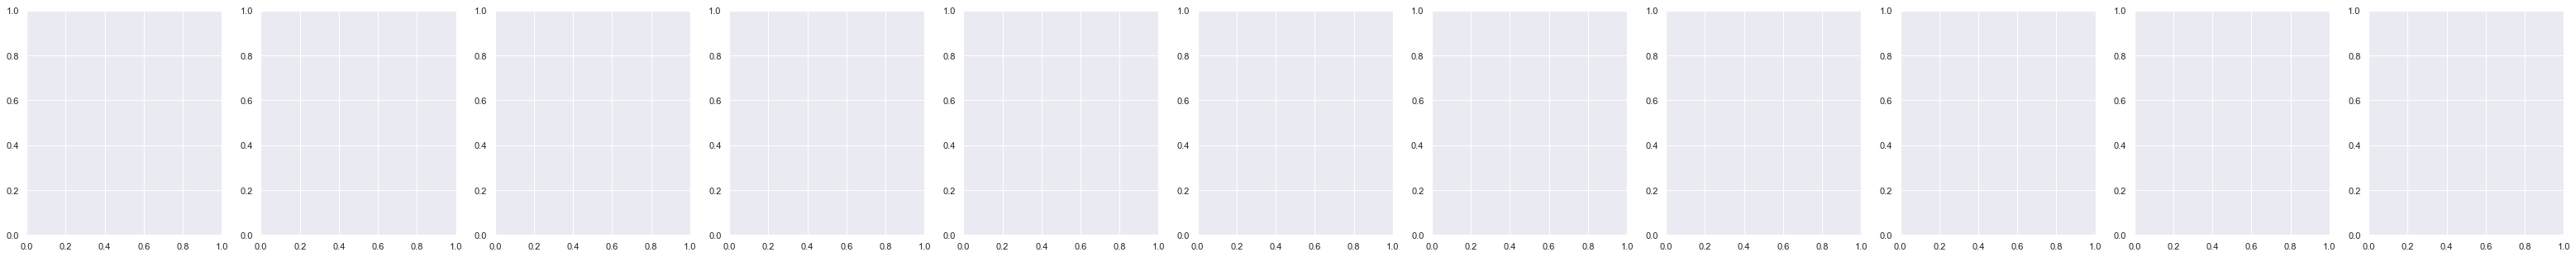

In [127]:
# ## plotting
# N = len(used_cols)
# fig, axs = plt.subplots(1,N,figsize=(N*5,5))

# titles = used_cols
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
#     ax.set_title(titles[i]);
# fig.tight_layout()
# fig.show()

In [33]:
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor


# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    if col in real_cols:
        term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(1, 2))
term_list.append(tensor(0, 1, 2))
term_list.append(tensor(4, 5))
term_list.append(tensor(1, 2, 6))



# term_list.append(tensor(7, 8, 10))
# term_list.append(tensor(0, 4))
# term_list.append(tensor(0, 1, 2, 3))




# factors
for i, col in enumerate(used_cols):
    if col in cat_cols:
        term_list.append(factor(i))


# create the terms and model
terms = np.sum(term_list)
print(terms)
# gam = LinearGAM(terms=terms).gridsearch(X.values, y.values)
# gam.summary()

s(0) + s(1) + s(2) + s(3) + te(1, 2) + te(0, 1, 2) + te(4, 5) + te(1, 2, 6) + f(4) + f(5) + f(6)


In [64]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import vtreat
import vtreat.util
import vtreat.transform





class GAMTransform(vtreat.transform.UserTransform):
    """a gam model"""
    def __init__(self):
        vtreat.transform.UserTransform.__init__(self, treatment='gam')
        self.models_ = None
    def fit(self, X, y):
        self.models_ = {
            v:pygam.LinearGAM().fit(X[[v]], y)
                for v in X.columns
                if vtreat.util.can_convert_v_to_numeric(X[v])}
        self.incoming_vars_ = [v for v in self.models_.keys()]
        self.derived_vars_ = [(v + "_gam") for v in self.incoming_vars_]
        return self
    def transform(self, X):
        cols = {
            self.derived_vars_[i]:self.models_[self.incoming_vars_[i]].predict(X[[self.incoming_vars_[i]]])
                for i in range(len(self.incoming_vars_))}
        return pandas.DataFrame(cols)
step = GAMTransform()

In [ ]:
# ## plotting
# N = len(used_cols)
# fig, axs = plt.subplots(1,N,figsize=(N*5,5))

# titles = used_cols
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
#     ax.set_title(titles[i]);
# fig.tight_layout()
# fig.show()

In [68]:
# from sklearn import linear_modelclf = linear_model.Lasso(alpha=0.1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size = .7)
# Define model
# Fit model
# gam.fit(train_X, train_y)
#get predicted prices on validation data
val_predictions = gam.predict(val_X)
train_predictions = gam.predict(train_X)
print("mean absolute error train: " , mean_absolute_error(train_y, train_predictions))
print("mean absolute error test: " , mean_absolute_error(val_y, val_predictions))
print("r2 predict train: " , r2_score(train_y, train_predictions))
print("r2 predict test: " , r2_score(val_y, val_predictions))
#print(cross_val_score(gam, train_X, train_y, cv=3, scoring = 'r2'))


mean absolute error train:  77393.24177901633
mean absolute error test:  78735.50474902311
r2 predict train:  0.8450948318151117
r2 predict test:  0.8452833620283181


In [65]:
fit = step.fit_transform(X, y)
print(step.derived_vars_)
fit[used_cols] = df[used_cols]
fit.head()

['sqft_living_gam', 'lat_gam', 'long_gam', 'year_gam', 'bedrooms_gam', 'bathrooms_gam', 'zipcode_gam']


,sqft_living_gam,lat_gam,long_gam,year_gam,bedrooms_gam,bathrooms_gam,zipcode_gam,sqft_living,lat,long,year,bedrooms,bathrooms,zipcode
0,35804.529052,1982.972241,57844.410504,533710.027535,246933.184831,52894.628556,13633.734240,1360.0,47.602210,-122.311525,2019,3.0,1.75,98122
1,29455.454450,6064.121431,58922.852387,533710.027535,169642.685932,31891.928727,20067.281166,2480.0,47.640532,-122.366597,2019,5.0,2.00,98119
2,42382.990735,-1296.238154,60417.325230,533710.027535,246933.184831,52894.628556,962.742225,1710.0,47.588703,-122.310853,2019,3.0,1.75,98144
3,20301.739277,2961.130157,32753.379572,533710.027535,246933.184831,29649.538710,9483.894052,2210.0,47.428930,-122.162640,2019,3.0,2.75,98058
4,14183.268842,3016.925799,41024.351780,533710.027535,169642.685932,38244.725380,16918.063092,2560.0,47.408924,-122.169864,2019,5.0,2.50,98031


In [31]:
real_cols2 = ['sqft_living', 'lat', 'long',  'sqft_lot', 'sqft_living_gam', 'lat_gam', 'long_gam',  'sqft_lot_gam' ]
cat_cols2 = ['bedrooms', 'bathrooms', 'bedrooms_gam', 'bathrooms_gam', 'grade', 'view', 'yr_renovated', 'condition', 'yr_built', 'grade_gam', 'view_gam', 'condition_gam', 'yr_built_gam']
used_cols2 =  real_cols2 + cat_cols2

In [28]:
X2, y2 = fit[used_cols2], df[target]

In [34]:
# create the term list
term_list = []
for i, col in enumerate(used_cols2):
    if col in real_cols2:
        term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(1, 2))
term_list.append(tensor(5, 6))
term_list.append(tensor(0, 1, 2))
term_list.append(tensor(0, 3))
term_list.append(tensor(5, 6))
term_list.append(tensor(1, 2, 5, 6))




# factors
for i, col in enumerate(used_cols2):
    if col in cat_cols2:
        term_list.append(factor(i))


# create the terms and model
terms = np.sum(term_list)
print(terms)
# gam = LinearGAM(

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + te(1, 2) + te(5, 6) + te(0, 1, 2) + te(0, 3) + te(1, 2, 5, 6) + f(8) + f(9) + f(10) + f(11) + f(12) + f(13) + f(14) + f(15) + f(16) + f(17) + f(18) + f(19) + f(20)


In [168]:
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_target
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,12.309987
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,2.0,98125,47.7210,-122.319,1690,7639,13.195616
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,12.100718
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,13.311331
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,12.793862
21259,21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,12.899222
21260,21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,12.904461
21261,21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,12.899222


In [178]:
fit

,sqft_living_gam,lat_gam,long_gam,bedrooms_gam,bathrooms_gam,sqft_lot_gam,grade_gam,view_gam,yr_renovated_gam,condition_gam,...,lat,long,bedrooms,bathrooms,sqft_lot,grade,view,yr_renovated,condition,yr_built
0,349802.556463,397474.190398,629636.661769,466277.049456,346471.746741,501893.496524,401117.414101,494196.473635,527846.626417,538353.391910,...,47.5112,-122.257,3,1.00,5650,7,0.0,0.0,3,1955
1,612324.374155,517500.156335,436063.577422,466277.049456,520706.567372,517811.471664,401117.414101,494196.473635,765485.568972,538353.391910,...,47.7210,-122.319,3,2.25,7242,7,0.0,2.0,3,1951
2,283367.945040,476324.576553,664101.771077,401386.694844,346471.746741,543749.134009,301353.555374,494196.473635,527846.626417,538353.391910,...,47.7379,-122.233,2,1.00,10000,6,0.0,0.0,3,1933
3,467483.954077,444718.900484,606036.148630,635564.256089,775192.206029,495191.272366,401117.414101,494196.473635,527846.626417,603465.638032,...,47.5208,-122.393,4,3.00,5000,7,0.0,0.0,5,1965
4,422303.913219,847260.231909,563565.561594,466277.049456,467222.902860,525910.104349,540487.579950,494196.473635,527846.626417,538353.391910,...,47.6168,-122.045,3,2.00,8080,8,0.0,0.0,3,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,400678.283182,580136.934697,447433.311722,466277.049456,558705.720115,452803.044104,540487.579950,494196.473635,527846.626417,538353.391910,...,47.6993,-122.346,3,2.50,1131,8,0.0,0.0,3,2009
21259,542867.451720,395403.435179,484828.649282,635564.256089,558705.720115,503555.640230,540487.579950,494196.473635,527846.626417,538353.391910,...,47.5107,-122.362,4,2.50,5813,8,0.0,0.0,3,2014
21260,325080.101414,722593.885789,476836.069419,401386.694844,306014.183767,455318.304171,401117.414101,494196.473635,527846.626417,538353.391910,...,47.5944,-122.299,2,0.75,1350,7,0.0,0.0,3,2009
21261,410680.803161,532121.889338,608602.637106,466277.049456,558705.720115,467048.859667,540487.579950,494196.473635,527846.626417,538353.391910,...,47.5345,-122.069,3,2.50,2388,8,0.0,0.0,3,2004


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X2, y2, random_state = 0, train_size = .7)
# Define model
# Fit model
gam.fit(train_X, train_y)
#get predicted prices on validation data
val_predictions = gam.predict(val_X)
train_predictions = gam.predict(train_X)
print("mean absolute error train: " , mean_absolute_error(np.expm1(train_y), np.expm1(train_predictions)))
print("mean absolute error test: " , mean_absolute_error(np.expm1(val_y), np.expm1(val_predictions)))
print("r2 predict train: " , r2_score(train_y, train_predictions))
print("r2 predict test: " , r2_score(val_y, val_predictions))
#print(cross_val_score(gam, train_X, train_y, cv=3, scoring = 'r2'))


mean absolute error train:  65666.88279376294
mean absolute error test:  71994.90525801985
r2 predict train:  0.9025412906855255
r2 predict test:  0.8835433677371547


In [36]:
mars = Earth(max_degree=4)

In [37]:
mars.fit(X,y)


NameError: name 'model' is not defined

In [38]:
print(mars.trace())
print(mars.summary())

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.273442  1      0.273  0.000  0.000  
1     0       6    -1     0.138858  2      0.139  0.492  0.492  
2     0       1    11498  0.100567  4      0.101  0.632  0.632  
3     1       0    -1     0.081703  5      0.082  0.701  0.701  
4     2       1    8019   0.071468  7      0.072  0.739  0.738  
5     5       1    -1     0.059505  8      0.060  0.782  0.782  
6     0       7    -1     0.054810  9      0.055  0.800  0.799  
7     1       9    -1     0.052110  10     0.052  0.809  0.809  
8     5       2    13750  0.050595  12     0.051  0.815  0.814  
9     0       3    3749   0.049168  14     0.049  0.820  0.820  
10    4       6    -1     0.047456  15     0.048  0.826  0.826  
11    0       11   -1     0.046132  16     0.046  0.831  0.831  
12    1     

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
model = GradientBoostingRegressor(loss='huber', n_estimators=10000, verbose=1, max_depth=5, max_features=4, subsample=.8,min_samples_split=3, min_samples_leaf=2)

In [63]:
from xgboost import XGBRegressor
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.06, gamma=0, 
                           subsample=0.8, colsample_bytree=1, max_depth=5,
                           n_jobs=-1, objective='reg:squarederror')
model=xgb.fit(train_X,train_y)
#get predicted prices on validation data
val_predictions = model.predict(val_X)
train_predictions = model.predict(train_X)
print("mean absolute error train: " , mean_absolute_error(np.expm1(train_y), np.expm1(train_predictions)))
print("mean absolute error test: " , mean_absolute_error(np.expm1(val_y), np.expm1(val_predictions)))
print("r2 predict train: " , r2_score(train_y, train_predictions))
print("r2 predict test: " , r2_score(val_y, val_predictions))

mean absolute error train:  40993.33607922098
mean absolute error test:  63771.116221194534
r2 predict train:  0.9589291747430049
r2 predict test:  0.897539108572173


In [53]:
df['year'] = 2019

In [54]:
y_preds = gam.predict(X)

In [55]:
print(y_preds)

[ 672256.81095902 1273737.06622931  627863.55965166  536480.88649098
  482237.76045522]


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [60]:
print('error =', (y_preds - df[target]))

error = 0   -112743.189041
1    137737.066229
2    -14636.440348
3     21480.886491
4    -92712.239545
Name: price, dtype: float64


In [63]:
print("mean absolute error test: " , mean_absolute_error(y_preds, df[target]))
print("r2 predict test: " , r2_score(y_preds, df[target]))

mean absolute error test:  75861.96433087518
r2 predict test:  0.8995228089915434
